In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #visualisation
np.random.seed(42)
random.seed(42)

C:\Users\luozh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("PEA11.20231025T121029.csv")

In [3]:
data.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [4]:
data.dtypes

STATISTIC Label       object
Year                   int64
Single Year of Age    object
Sex                   object
UNIT                  object
VALUE                  int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.0+ KB


In [6]:
data.shape

(11817, 6)

In [7]:
data.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


In [8]:
data.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.0+ KB


In [10]:
data.drop(["STATISTIC Label","UNIT"],axis = 1,inplace = True)

In [11]:
data.head()

,Year,Single Year of Age,Sex,VALUE
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [12]:
data["Single Year of Age"].unique()

array(['All ages', 'Under 1 year', '1 year', '2 years', '3 years',
       '4 years', '5 years', '6 years', '7 years', '8 years', '9 years',
       '10 years', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '20 years', '21 years', '22 years', '23 years', '24 years',
       '25 years', '26 years', '27 years', '28 years', '29 years',
       '30 years', '31 years', '32 years', '33 years', '34 years',
       '35 years', '36 years', '37 years', '38 years', '39 years',
       '40 years', '41 years', '42 years', '43 years', '44 years',
       '45 years', '46 years', '47 years', '48 years', '49 years',
       '50 years', '51 years', '52 years', '53 years', '54 years',
       '55 years', '56 years', '57 years', '58 years', '59 years',
       '60 years', '61 years', '62 years', '63 years', '64 years',
       '65 years', '66 years', '67 years', '68 years', '69 years',
       '70 years', '71 years', '72 years', '73 years', '

In [13]:
values_to_remove =["All ages"]
data = data[~data["Single Year of Age"].isin(values_to_remove)]

In [14]:
## You can also use the drop method, but the process is a bit more complex
values_to_remove = ["All ages"]
# Find the indices of rows where "Single Year of Age" column contains values from values_to_remove list
indices_to_remove = data[data["Single Year of Age"].isin(values_to_remove)].index
# Drop the rows with the found indices from the DataFrame df
data = data.drop(indices_to_remove)

In [15]:
#ages = data["Single Year of Age"].unique()

#for i in ages:
    #if i[:1] == "U":
    
        #data["Single Year of Age"].replace("U",0.5,inplace = True)
    #else:
        
        #data["Single Year of Age"].replace(i,int(i[:2]),inplace = True)




In [16]:
class AgeDataProcessor :
    def __init__(self,data):
        self.data = data
        self.ages = data["Single Year of Age"].unique()
    
    def process_ages(self):
        for i in self.ages:
            if i[:1] == "U":
                self.data.loc[self.data["Single Year of Age"] =="Under 1 year","Single Year of Age"] = 0.5
            else:
                self.data.loc[self.data["Single Year of Age"] == i,"Single Year of Age"] = float(i[:2])
processor = AgeDataProcessor(data)
processor.process_ages()
print(data)

       Year Single Year of Age         Sex  VALUE
3      1926                0.5  Both sexes  55391
4      1926                0.5        Male  28084
5      1926                0.5      Female  27307
6      1926                1.0  Both sexes  55876
7      1926                1.0        Male  28374
...     ...                ...         ...    ...
11812  2023               98.0        Male    197
11813  2023               98.0      Female    632
11814  2023               99.0  Both sexes   1600
11815  2023               99.0        Male    352
11816  2023               99.0      Female   1248

[11700 rows x 4 columns]


In [17]:
data["Single Year of Age"].unique()

array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
       13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0,
       24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0,
       35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0,
       46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0,
       57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0,
       68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0,
       79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0,
       90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0],
      dtype=object)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 3 to 11816
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                11700 non-null  int64 
 1   Single Year of Age  11700 non-null  object
 2   Sex                 11700 non-null  object
 3   VALUE               11700 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 457.0+ KB


In [19]:
data['Single Year of Age'] = data['Single Year of Age'].astype(float)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 3 to 11816
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                11700 non-null  int64  
 1   Single Year of Age  11700 non-null  float64
 2   Sex                 11700 non-null  object 
 3   VALUE               11700 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 457.0+ KB


In [21]:
data_birth = data[data["Single Year of Age"] == 0.5 ]
data_birth

,Year,Single Year of Age,Sex,VALUE
3,1926,0.5,Both sexes,55391
4,1926,0.5,Male,28084
5,1926,0.5,Female,27307
306,1936,0.5,Both sexes,53606
307,1936,0.5,Male,27152
...,...,...,...,...
11215,2022,0.5,Male,29546
11216,2022,0.5,Female,28138
11517,2023,0.5,Both sexes,55716
11518,2023,0.5,Male,27418


In [22]:
value_to_remove = 'Both sexes'

data = data[data["Sex"] != value_to_remove]

data

,Year,Single Year of Age,Sex,VALUE
4,1926,0.5,Male,28084
5,1926,0.5,Female,27307
7,1926,1.0,Male,28374
8,1926,1.0,Female,27502
10,1926,2.0,Male,29728
...,...,...,...,...
11810,2023,97.0,Female,821
11812,2023,98.0,Male,197
11813,2023,98.0,Female,632
11815,2023,99.0,Male,352


In [23]:
from sklearn.preprocessing import OneHotEncoder

ohot = OneHotEncoder(sparse = False)

ohot.fit_transform(data[["Sex"]])

data = pd.get_dummies(data,prefix = "Sex",columns = ["Sex"])

data

,Year,Single Year of Age,VALUE,Sex_Female,Sex_Male
4,1926,0.5,28084,0,1
5,1926,0.5,27307,1,0
7,1926,1.0,28374,0,1
8,1926,1.0,27502,1,0
10,1926,2.0,29728,0,1
...,...,...,...,...,...
11810,2023,97.0,821,1,0
11812,2023,98.0,197,0,1
11813,2023,98.0,632,1,0
11815,2023,99.0,352,0,1


In [24]:
data = data.reset_index(drop=True)
data

,Year,Single Year of Age,VALUE,Sex_Female,Sex_Male
0,1926,0.5,28084,0,1
1,1926,0.5,27307,1,0
2,1926,1.0,28374,0,1
3,1926,1.0,27502,1,0
4,1926,2.0,29728,0,1
...,...,...,...,...,...
7795,2023,97.0,821,1,0
7796,2023,98.0,197,0,1
7797,2023,98.0,632,1,0
7798,2023,99.0,352,0,1


In [25]:
data =data[["Year","Single Year of Age","Sex_Female","Sex_Male","VALUE"]]

In [26]:
data.shape

(7800, 5)

In [27]:
data.describe()

,Year,Single Year of Age,Sex_Female,Sex_Male,VALUE
count,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000
mean,1996.410256,49.505000,0.500000,0.500000,20272.447821
std,24.463698,28.859388,0.500032,0.500032,11910.053644
min,1926.000000,0.500000,0.000000,0.000000,6.000000
25%,1986.000000,24.750000,0.000000,0.000000,10576.750000
50%,2004.000000,49.500000,0.500000,0.500000,22863.000000
75%,2014.000000,74.250000,1.000000,1.000000,30243.000000
max,2023.000000,99.000000,1.000000,1.000000,44954.000000


<AxesSubplot:xlabel='Year'>

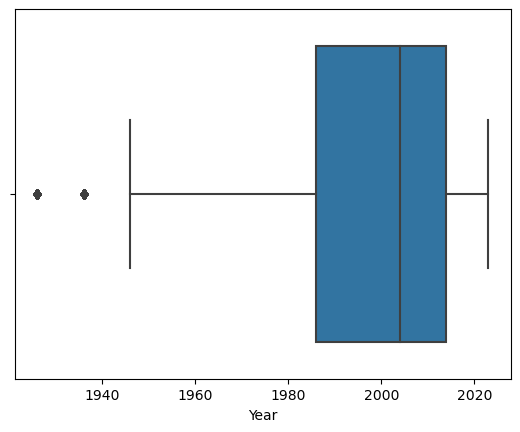

In [28]:
sns.boxplot(x = data["Year"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef82f2efd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef82d515b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef82f2eca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef82d51b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef82d51e20>],
 'means': []}

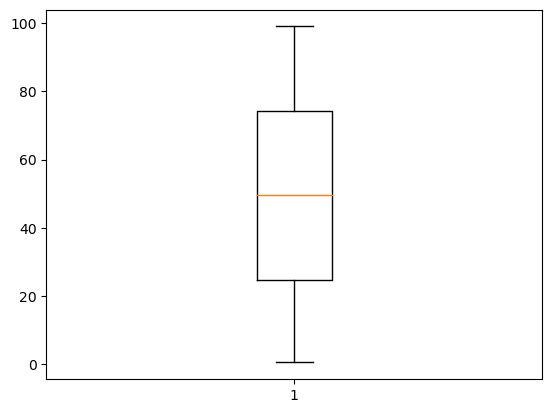

In [29]:
plt.boxplot(x = data["Single Year of Age"])

<AxesSubplot:xlabel='VALUE'>

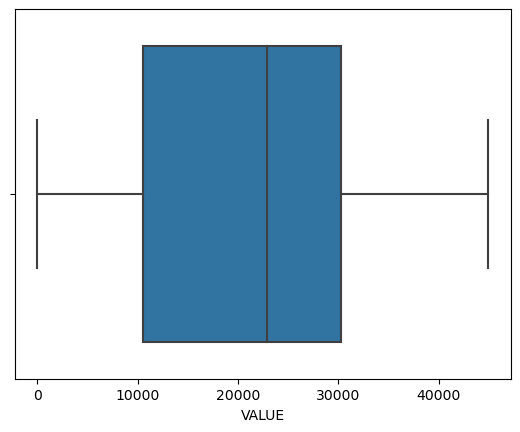

In [30]:
sns.boxplot(x = data["VALUE"])

In [31]:
data_male_birth = data_birth[data_birth["Sex"] == "Male"]
data_male_birth = data_male_birth["VALUE"].sum()
data_male_birth

1232579

In [32]:
data_female_birth = data_birth[data_birth["Sex"] == "Female"]
data_female_birth = data_female_birth["VALUE"].sum()
data_female_birth

1176220

In [33]:
# Import necessary libraries
from scipy.stats import binom_test

# Define the observed male and female birth counts
observed_male = data_male_birth
observed_female = data_female_birth

# Calculate the total number of births
total_birth = observed_male + observed_female

# Define the probability of a male birth
p = 0.5

# Perform a two-sided binomial test to compare observed male births to the expected binomial distribution
p_value_male = binom_test(observed_male, n=total_birth, p=p, alternative='two-sided') 

# Print the p-value for male births
print("p value of Male:", p_value_male)

# Set the significance level (alpha)
alpha = 0.05  

# Check if the p-value is less than alpha to make a hypothesis decision
if p_value_male < alpha:
    print("Reject the null hypothesis: The distribution of male births differs significantly from the expected binomial distribution.")
else:
    print("Not rejecting the null hypothesis: The distribution of male births does not differ significantly from the expected binomial distribution.")


p value of Male: 9.69875184393043e-289
Reject the null hypothesis: The distribution of male births differs significantly from the expected binomial distribution.


C:\Users\luozh\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


In [34]:
data_birth

,Year,Single Year of Age,Sex,VALUE
3,1926,0.5,Both sexes,55391
4,1926,0.5,Male,28084
5,1926,0.5,Female,27307
306,1936,0.5,Both sexes,53606
307,1936,0.5,Male,27152
...,...,...,...,...
11215,2022,0.5,Male,29546
11216,2022,0.5,Female,28138
11517,2023,0.5,Both sexes,55716
11518,2023,0.5,Male,27418


In [35]:
data_male_birth = data_birth[data_birth["Sex"] == "Male"]
data_male_birth

,Year,Single Year of Age,Sex,VALUE
4,1926,0.5,Male,28084
307,1936,0.5,Male,27152
610,1946,0.5,Male,33798
913,1951,0.5,Male,32630
1216,1961,0.5,Male,32137
1519,1966,0.5,Male,32514
1822,1971,0.5,Male,33276
2125,1979,0.5,Male,36171
2428,1981,0.5,Male,37717
2731,1986,0.5,Male,31315


In [36]:
data_male_birth = data_male_birth.tail(24)
data_male_birth = data_male_birth[["Year","VALUE"]]
data_male_birth = data_male_birth.reset_index(drop=True)
data_male_birth

,Year,VALUE
0,2000,27633
1,2001,28427
2,2002,27805
3,2003,31047
4,2004,31452
5,2005,31490
6,2006,31302
7,2007,34101
8,2008,36855
9,2009,37673


In [37]:
# Import necessary libraries
from scipy.stats import poisson, chisquare

# Extract the 'Year' and 'VALUE' columns from the 'data_male_birth' dataset
years = data_male_birth["Year"]
boys_count = data_male_birth["VALUE"]

# Calculate the mean of 'boys_count'
mean_boys = np.mean(boys_count)

# Create a list of expected counts with the same length as 'boys_count'
expected_counts = [mean_boys] * len(boys_count)

# Perform the chi-square test for goodness of fit
chi2_stat, p_val = chisquare(boys_count, expected_counts)

# Print the chi-square statistic and p-value
print(f"Chi2 Stat: {chi2_stat}")
print(f"P Value: {p_val}")

# Set the significance level (alpha)
alpha = 0.05 

# Check if the p-value is less than alpha to make a hypothesis decision
if p_val < alpha:
    print("Reject the null hypothesis, the data does not follow a Poisson distribution ")
else:
    print("Fail to reject the null hypothesis, the data follows a Poisson distribution.")


Chi2 Stat: 8204.58682647099
P Value: 0.0
Reject the null hypothesis, the data does not follow a Poisson distribution 


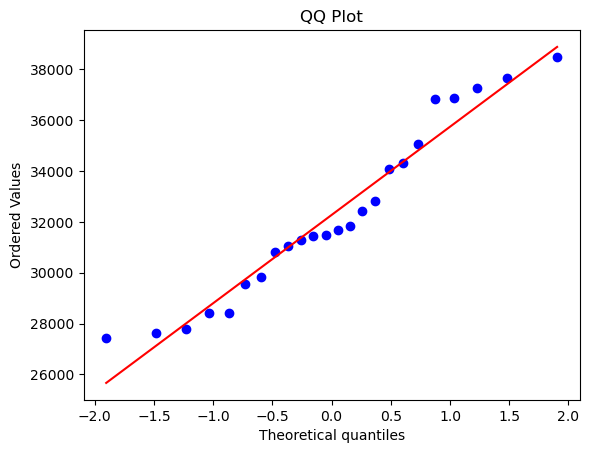

In [38]:
import scipy.stats as stats
stats.probplot(data_male_birth["VALUE"], dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [39]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(data_male_birth["VALUE"])
print("Shapiro-Wilk Test p-value:", shapiro_p_value)
alpha = 0.05



Shapiro-Wilk Test p-value: 0.15492160618305206


In [40]:
if shapiro_p_value < alpha:
    
    print("Reject the null hypothesis, the data does not follow a Normal distribution ")
    
else:
    
    print("Fail to reject the null hypothesis, the data follows a Normal distribution.")


Fail to reject the null hypothesis, the data follows a Normal distribution.


In [41]:
data

,Year,Single Year of Age,Sex_Female,Sex_Male,VALUE
0,1926,0.5,0,1,28084
1,1926,0.5,1,0,27307
2,1926,1.0,0,1,28374
3,1926,1.0,1,0,27502
4,1926,2.0,0,1,29728
...,...,...,...,...,...
7795,2023,97.0,1,0,821
7796,2023,98.0,0,1,197
7797,2023,98.0,1,0,632
7798,2023,99.0,0,1,352


In [42]:
age_group= data.groupby("Single Year of Age")["VALUE"].sum()

In [43]:
type(age_group)

pandas.core.series.Series

In [44]:
age_group_df = age_group.reset_index()

In [45]:
age_group_df

,Single Year of Age,VALUE
0,0.5,2408799
1,1.0,2386266
2,2.0,2378626
3,3.0,2386960
4,4.0,2392144
...,...,...
95,95.0,34382
96,96.0,23900
97,97.0,17056
98,98.0,11787


In [46]:
bins = range(0, 110, 10)
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
age_group_df['Single Year of Age'] = pd.cut(age_group_df['Single Year of Age'], bins=bins, labels=labels, right=False)

In [47]:
grouped_population = age_group_df.groupby('Single Year of Age')['VALUE'].sum()

In [48]:
grouped_population

Single Year of Age
0-9      24043414
10-19    23896919
20-29    22560465
30-39    23140943
40-49    21024520
50-59    17345438
60-69    13241821
70-79     8698341
80-89     3623717
90-99      549515
Name: VALUE, dtype: int64

In [49]:
grouped_population =grouped_population.reset_index()

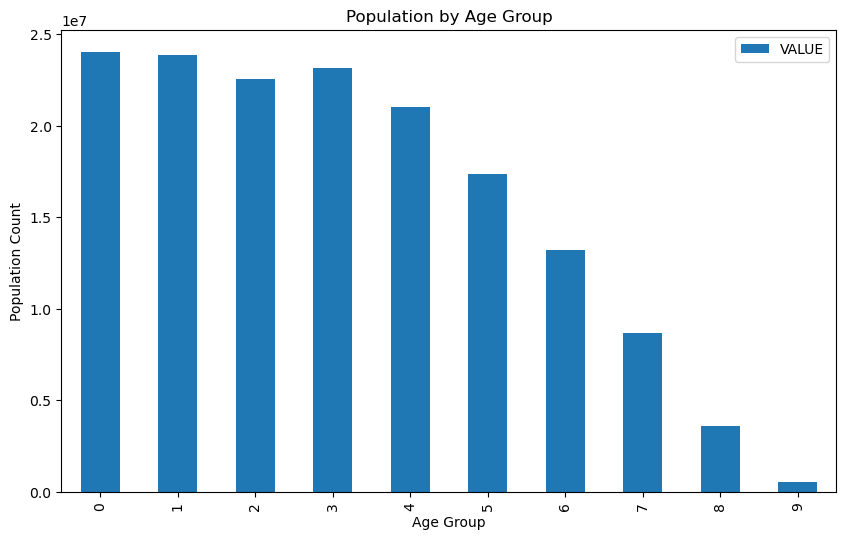

In [50]:
grouped_population.plot(kind='bar', figsize=(10, 6))
plt.title('Population by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Population Count')
plt.show()

In [51]:
row_index = data.index[data['Year'] == 1996]

In [52]:
row_index[0]

2200

In [53]:
data = data[2200:]

In [54]:
data= data.reset_index(drop=True)

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
correlation_matrix = data.corr()

In [57]:
correlation_matrix

,Year,Single Year of Age,Sex_Female,Sex_Male,VALUE
Year,1.000000e+00,1.103015e-14,7.033112e-17,2.822591e-15,0.201837
Single Year of Age,1.103015e-14,1.000000e+00,1.099216e-18,9.826988e-17,-0.863525
Sex_Female,7.033112e-17,1.099216e-18,1.000000e+00,-1.000000e+00,0.013419
Sex_Male,2.822591e-15,9.826988e-17,-1.000000e+00,1.000000e+00,-0.013419
VALUE,2.018366e-01,-8.635254e-01,1.341896e-02,-1.341896e-02,1.000000


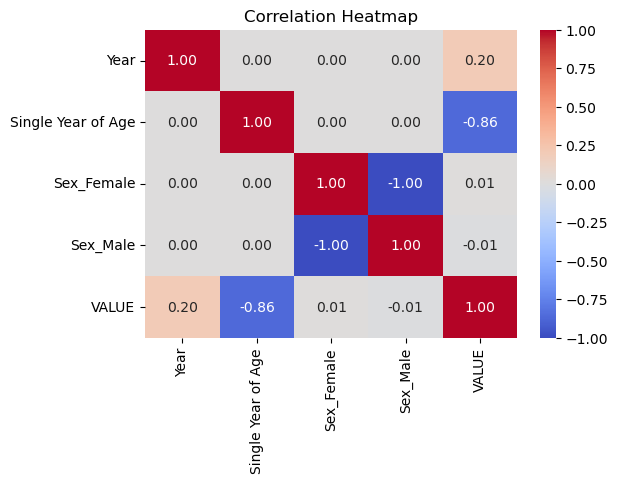

In [58]:
plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [59]:
x = data.iloc[:,0:4]

In [60]:
x[:3]

,Year,Single Year of Age,Sex_Female,Sex_Male
0,1996,0.5,0,1
1,1996,0.5,1,0
2,1996,1.0,0,1


In [61]:
y = data.iloc[:,-1]

In [62]:
y[:3]

0    25231
1    23623
2    24963
Name: VALUE, dtype: int64

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [64]:
x

array([[-1.67125804, -1.69816984, -1.        ,  1.        ],
       [-1.67125804, -1.69816984,  1.        , -1.        ],
       [-1.67125804, -1.68084335, -1.        ,  1.        ],
       ...,
       [ 1.67125804,  1.68049682,  1.        , -1.        ],
       [ 1.67125804,  1.71514981, -1.        ,  1.        ],
       [ 1.67125804,  1.71514981,  1.        , -1.        ]])

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
#(393353**0.5)/25231 *100

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression (MSE):", mse)
print("Linear Regression R平方 (R-squared):", r2)

Linear Regression (MSE): 30872154.416138384
Linear Regression R平方 (R-squared): 0.7872980406336839


In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define Ridge Model
ridge_model = Ridge()

# Define the range of alpha values to search, using a uniform distribution here.
param_dist = {'alpha': uniform(0.01, 10)}

# Create a RandomizedSearchCV object.
random_search = RandomizedSearchCV(
    ridge_model, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=10, random_state=42
)

# Perform a random search.
random_search.fit(X_train, y_train)

# Obtain the best Ridge model.
best_ridge_model = random_search.best_estimator_

# Make predictions using the best model.
y_pred = best_ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and the coefficient of determination (R-squared).
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best alpha (regularization parameter) and model performance metrics.
print('Best alpha (C):', best_ridge_model.alpha)
print('Coefficients: \n', best_ridge_model.coef_)
print('Ridge regression (MSE): %.2f' % mse)
print('Ridge regression (R-squared): %.2f' % r2)

Best alpha (C): 0.06522117123602399
Coefficients: 
 [  2441.03409036 -10417.35338231     70.67525922    -70.67525922]
Ridge regression (MSE): 30878649.79
Ridge regression (R-squared): 0.79


In [70]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV


# Define a KFold cross-validation with 1000splits
kf = KFold(n_splits=1000, shuffle=True, random_state=42)

# Create a LassoCV model with cross-validation using KFold
lasso_cv = LassoCV(cv=kf, max_iter=10000, random_state=42)

# Fit the LassoCV model to the data (x, y).
lasso_cv.fit(x, y)

# Print the best alpha (regularization parameter) selected by LassoCV.
print("Best alpha:", lasso_cv.alpha_)

# Make predictions using the trained LassoCV model.
Y_pred = lasso_cv.predict(x)

# Calculate the Mean Squared Error (MSE) between the true values (y) and predicted values (Y_pred).
mse = mean_squared_error(y, Y_pred)

# Calculate the coefficient of determination (R-squared) to assess model performance.
r2 = r2_score(y, Y_pred)

# Print the Mean Squared Error (MSE) and Coefficient of Determination (R-squared).
print('Lasso regression (MSE): %.2f' % mse)
print('Lasso regression (R-squared): %.2f' % r2)


Best alpha: 10.410726425393213
Lasso regression (MSE): 31018630.63
Lasso regression (R-squared): 0.79


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf'],  # Different kernel functions
    'C': [10000.0,100000.0,1000000,0],              # Different regularization parameters
    'epsilon': [0.1, 0.2, 0.3,1]         # Different tolerance parameters
}

# Create an SVR model
svr = SVR()

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation and negative mean squared error as the scoring metric
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training datarandom_state=42 (X_train, y_train) using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

# Create the best SVR model based on the best hyperparameters
best_model = SVR(**best_params)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Use the best model to make predictions on the test data (X_test)
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and coefficient of determination (R-squared) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and model performance metrics
print("Best hyperparameters:", best_params)
print("SVR regression (MSE):", mse)
print("SVR regression (R-squared):", r2)

C:\Users\luozh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\luozh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\luozh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\luozh\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

Best hyperparameters: {'C': 1000000, 'epsilon': 0.1, 'kernel': 'rbf'}
SVR regression (MSE): 3249237.114947746
SVR regression (R-squared): 0.9776135124397454


In [72]:
from sklearn.neighbors import KNeighborsRegressor

# Define a parameter grid for the number of neighbors
param_grid = {'n_neighbors': list(range(1, 18))}

# Create a KNeighborsRegressor model.
knn = KNeighborsRegressor()

# Initialize GridSearchCV with KNeighborsRegressor, the parameter grid, 5-fold cross-validation, and negative mean squared error as the scoring metric.
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data (X_train, y_train).
grid_search.fit(X_train, y_train)

# Get the best value for the number of neighbors (n_neighbors) from the grid search results.
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create the best KNeighborsRegressor model using the best number of neighbors.
best_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)

# Fit the best model to the training data.
best_model.fit(X_train, y_train)

# Make predictions on the test data (X_test).
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) between the true values (y_test) and predicted values (y_pred).
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R-squared) to assess model performance.
r2 = r2_score(y_test, y_pred)

# Print the best value for the number of neighbors, MSE, and R-squared.
print("Best n_neighbors parameter:", best_n_neighbors)
print("KNN regression (MSE):", mse)
print("KNN regression - R-squared:", r2)

Best n_neighbors parameter: 7
KNN regression (MSE): 403443.75284256565
KNN regression - R-squared: 0.9972203664322548


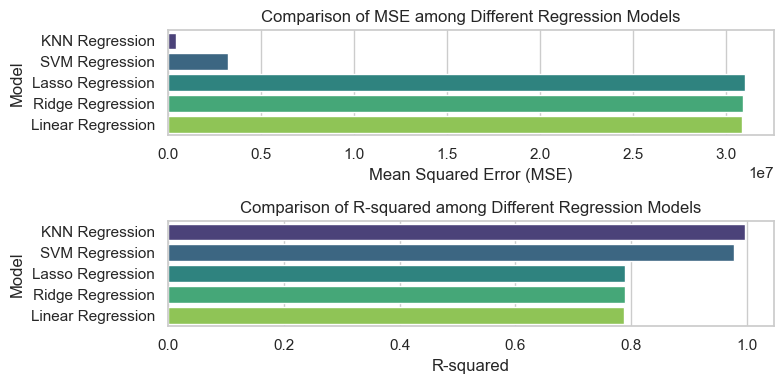

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['KNN Regression', 'SVM Regression', 'Lasso Regression', 'Ridge Regression', 'Linear Regression']

mse = [403443.75, 3249237.11, 31018630.63, 30878649.79, 30872154.42]

r_squared = [0.9972, 0.9776, 0.79, 0.79, 0.7873]

import pandas as pd
data = pd.DataFrame({'Model': models, 'MSE': mse, 'R-squared': r_squared})

# Set the plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(8, 4))

# Create a bar plot for MSE
plt.subplot(2, 1, 1)
sns.barplot(x='MSE', y='Model', data=data, palette='viridis')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE among Different Regression Models')

# Create a bar plot for R-squared
plt.subplot(2, 1, 2)
sns.barplot(x='R-squared', y='Model', data=data, palette='viridis')
plt.xlabel('R-squared')
plt.title('Comparison of R-squared among Different Regression Models')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()
